# 1 - Perkenalan

- Nama : Luvi Puspitasari 
- Batch : FTDS-012
- Dataset : Credit Card Fraud
- Objective : Memprediksi `default payment next month`
- Data Source : https://console.cloud.google.com/bigquery?sq=540278567683:33a5851873f04c88894c5da8fb61649c

# 2 - Import Libraries

In [160]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Model Definition
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Model Training
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Model Evaluation
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score

import warnings
warnings.filterwarnings("ignore")

# 3 - Data Loading

> Salinan query di Google Cloud Platform

SELECT  
  limit_balance, 
  sex, 
  education_level, 
  marital_status, 
  age, 
  pay_0, 
  pay_2, 
  pay_3, 
  pay_4, 
  pay_5, 
  pay_6, 
  bill_amt_1, 
  bill_amt_2, 
  bill_amt_3, 
  bill_amt_4, 
  bill_amt_5, 
  bill_amt_6, 
  pay_amt_1, 
  pay_amt_2, 
  pay_amt_3, 
  pay_amt_4, 
  pay_amt_5, 
  pay_amt_6, 
  default_payment_next_month
FROM `bigquery-public-data.ml_datasets.credit_card_default` LIMIT 23928

Dataset berikut berisikan Data Nasabah Bank yang memegang kartu kredit :
| Tabel Eksisting | Arti | 
| ----------- | :---------: |
| limit balance | batas pagu |
| sex | Jenis kelamin (1 = male; 2 = female)|
| education_level | pendidikan (1 = graduate school; 2 = university; 3 = high school; 4 = others) |
| marital status | status perkawinan (1 = married; 2 = single; 3 = others)|
| age | usia |
| pay | pembayaran |
| bill amt 0 - 6 | pembayaran minimum |
| pay amt 1 - 6  | history pembayaran |
| age | usia |
| default payment next month | prediksi dimana terjadinya gagal bayar atau tidak (1 = iya, 0 = tidak)|


In [161]:
# Load Dataset

data = pd.read_csv('h8dsft_P1M1_luvi_Puspitasari.csv')
data.T

,0,1,2,3,4,5,6,7,8,9,...,2955,2956,2957,2958,2959,2960,2961,2962,2963,2964
limit_balance,50000.0,110000.0,270000.0,130000.0,50000.0,20000.0,220000.0,50000.0,170000.0,50000.0,...,160000.0,260000.0,200000.0,90000.0,80000.0,210000.0,280000.0,80000.0,200000.0,20000.0
sex,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0
education_level,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0
marital_status,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,...,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0
age,39.0,29.0,36.0,45.0,24.0,29.0,38.0,42.0,41.0,24.0,...,40.0,26.0,49.0,44.0,45.0,39.0,41.0,28.0,53.0,24.0
pay_0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,2.0,1.0,1.0,-1.0
pay_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
pay_3,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,...,-1.0,-2.0,-1.0,-2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-2.0
pay_4,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.0,-2.0,-1.0,-2.0,-2.0,-1.0,-1.0,-1.0,-2.0,-2.0
pay_5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0


Dataset Census Adult Income memiliki 24 rows dan 2.965 columns

In [162]:
# Duplicate Dataset

data_copy = data.copy()

In [163]:
# Rename Columns

data.rename(columns={'sex' : 'gender', 'pay_0': 'pay_1'}, inplace=True)
data.T

,0,1,2,3,4,5,6,7,8,9,...,2955,2956,2957,2958,2959,2960,2961,2962,2963,2964
limit_balance,50000.0,110000.0,270000.0,130000.0,50000.0,20000.0,220000.0,50000.0,170000.0,50000.0,...,160000.0,260000.0,200000.0,90000.0,80000.0,210000.0,280000.0,80000.0,200000.0,20000.0
gender,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0
education_level,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0
marital_status,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,...,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0
age,39.0,29.0,36.0,45.0,24.0,29.0,38.0,42.0,41.0,24.0,...,40.0,26.0,49.0,44.0,45.0,39.0,41.0,28.0,53.0,24.0
pay_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,2.0,1.0,1.0,-1.0
pay_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
pay_3,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,...,-1.0,-2.0,-1.0,-2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-2.0
pay_4,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.0,-2.0,-1.0,-2.0,-2.0,-1.0,-1.0,-1.0,-2.0,-2.0
pay_5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0


In [164]:
# Check Dataset - 1

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   gender                      2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_1                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   int64  
 10  pay_6                       2965 non-null   int64  
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

In [165]:
# Check Dataset - 2

data.describe()

,limit_balance,gender,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
count,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000,...,2965.000000,2965.000000,2965.000000,2965.000000,2.965000e+03,2965.000000,2965.000000,2965.000000,2965.000000,2965.000000
mean,163369.308600,1.607757,1.849578,1.559865,35.193255,0.005059,-0.122428,-0.141653,-0.185160,-0.225295,...,44089.683305,40956.080607,39773.072513,6348.902867,6.272494e+03,5150.497133,4561.376054,4913.286678,5382.701518,0.214165
std,125030.415472,0.488333,0.778184,0.522317,9.109439,1.114395,1.180784,1.183630,1.178322,1.159003,...,61907.454056,58271.904751,57303.488981,20885.735336,2.887967e+04,14287.079982,13281.499599,16734.340778,17275.953029,0.410311
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-46627.000000,-46627.000000,-73895.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2582.000000,1958.000000,1430.000000,1013.000000,9.900000e+02,477.000000,313.000000,323.000000,173.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19894.000000,18814.000000,18508.000000,2234.000000,2.175000e+03,1994.000000,1600.000000,1646.000000,1615.000000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58622.000000,53373.000000,52287.000000,5087.000000,5.000000e+03,4500.000000,4000.000000,4021.000000,4081.000000,0.000000
max,800000.000000,2.000000,6.000000,3.000000,69.000000,8.000000,7.000000,7.000000,8.000000,7.000000,...,488808.000000,441981.000000,436172.000000,493358.000000,1.227082e+06,199209.000000,202076.000000,388071.000000,403500.000000,1.000000


1. Keseluruhan nasabah memiliki rata-rata pagu `$163.369`. Nasabah pemegang kartu kredit paling sedikit memiliki pagu `$ 10.000` dan paling besar ada di `$ 800.000`,
2. Usia rerata pemegang kartu kredit 35 tahun dimana diusia tersebut usia yang sangat produktif sehingga mengurangi risiko gagal bayar. Usia paling muda ada di 21 tahun dan usia maksimal pemegang kartu kredit ada di usia 69 tahun,

In [166]:
# Check head and shape 

print(data.shape)
data.head(5)

(2965, 24)


,limit_balance,gender,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,50000.0,1,1,2,39.0,0.0,0.0,0.0,0.0,0,...,50803.0,30789.0,15874.0,1800.0,2000.0,3000.0,2000.0,2000.0,2000.0,0
1,110000.0,2,1,2,29.0,0.0,0.0,0.0,0.0,0,...,32489.0,26354.0,20221.0,2000.0,2010.0,3000.0,3000.0,3000.0,1000.0,0
2,270000.0,1,1,2,36.0,0.0,0.0,0.0,2.0,0,...,40335.0,37165.0,22156.0,10076.0,4018.0,14.0,2051.0,2000.0,0.0,0
3,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
4,50000.0,1,1,2,24.0,0.0,0.0,0.0,0.0,0,...,19837.0,19855.0,20151.0,1367.0,1606.0,692.0,709.0,721.0,692.0,0


In [167]:
# Check tail 

data.tail(5)

,limit_balance,gender,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2960,210000.0,2,2,1,39.0,-1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,12000.0,0.0,28428.0,0.0,0.0,12000.0,33664.0,0
2961,280000.0,2,1,1,41.0,2.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,244.0,6859.0,486.0,0.0,0.0,244.0,0.0,0
2962,80000.0,1,1,2,28.0,1.0,-1.0,-1.0,-1.0,-2,...,0.0,0.0,0.0,47.0,207.0,0.0,0.0,0.0,0.0,0
2963,200000.0,1,2,1,53.0,1.0,-1.0,-1.0,-2.0,-2,...,0.0,0.0,6753.0,2920.0,0.0,0.0,0.0,6753.0,0.0,1
2964,20000.0,2,1,2,24.0,-1.0,-1.0,-2.0,-2.0,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


# 4 - Exploratory Data Analysis (EDA)

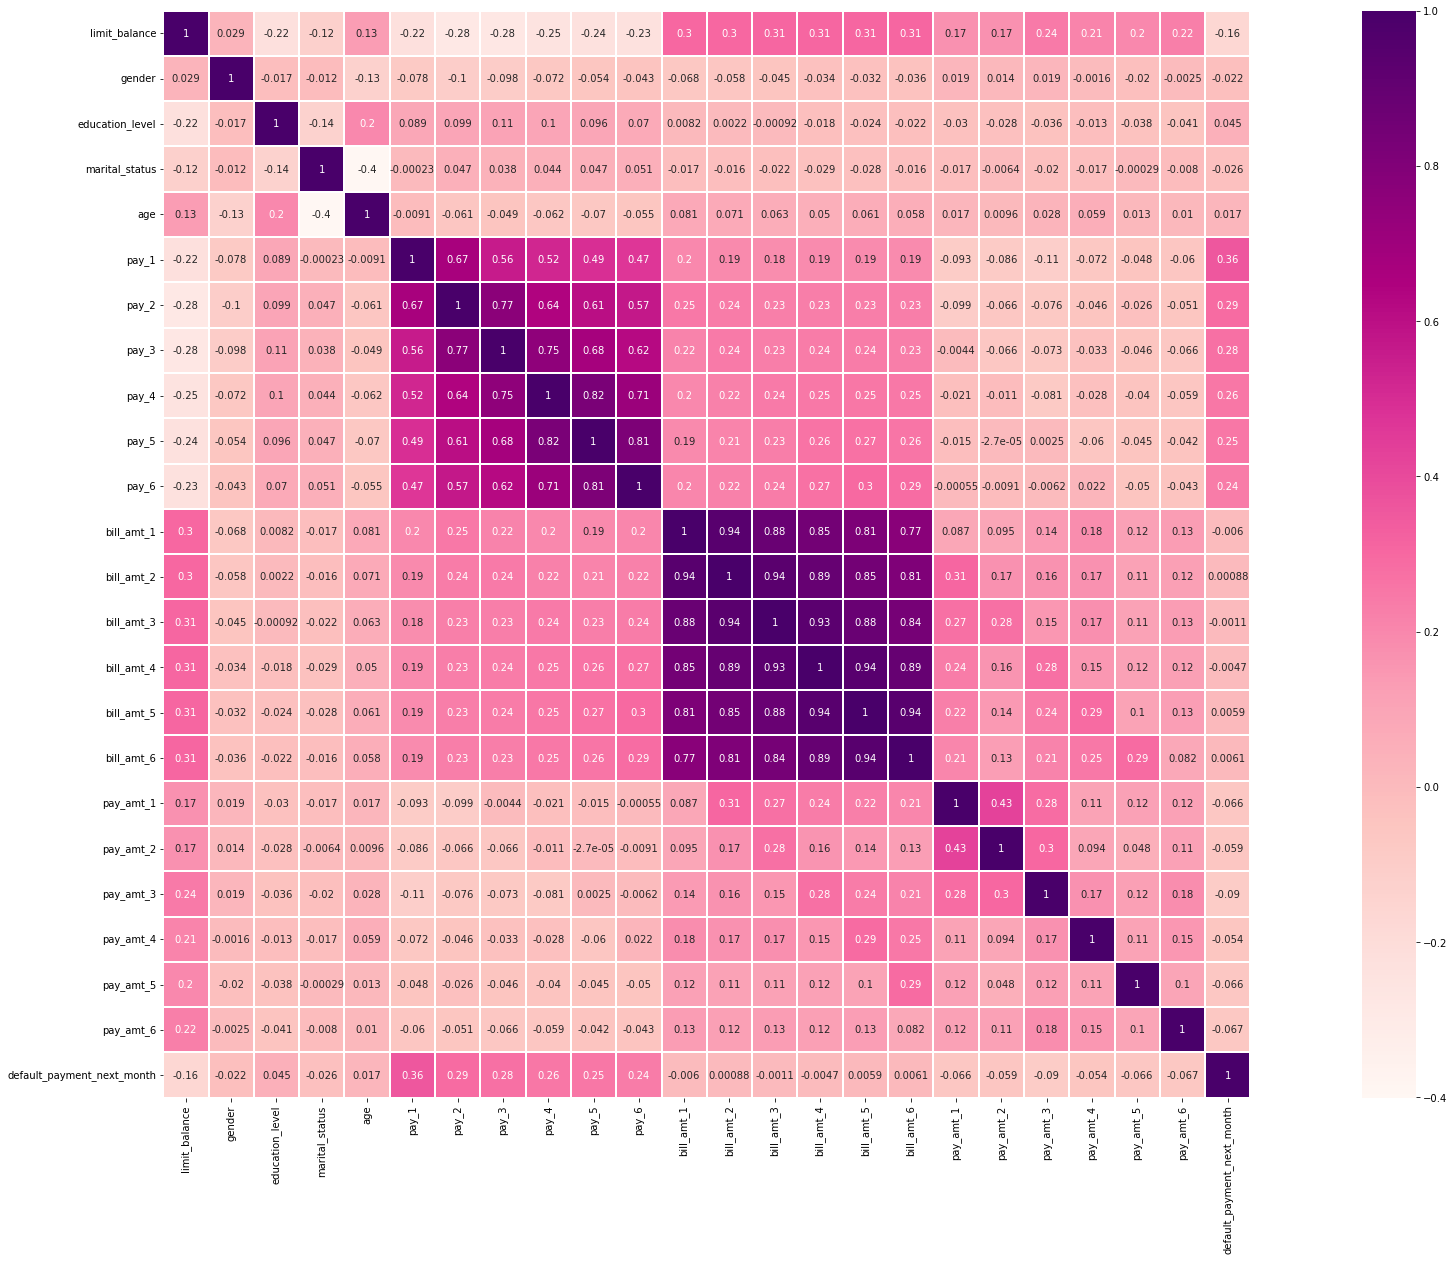

In [168]:
# Check korelasi antara kolom

# Heatmap
corrmat = data.corr()
top_corr_feature = corrmat.index

plt.figure(figsize=(40,20))
g = sns.heatmap(data[top_corr_feature].corr(), annot=True, cmap='RdPu', square=10, linewidths=0.2)

> Default payment yang pastinya sangat dipengaruhi oleh kolom pembayaran. Dalam heatmap kita dapat lihat bahwa `gender`, `marital status` tidak mempunyai pengaruh yang besar terhadap pembayaran, tetapi education memiliki sedikit pengaruh, ada kemungkinan nasabah yang memiliki latar belakang pendidikan yang bagus memiliki gaji yang tinggi, sehingga dalam proses pembayaran tiap bulan dapat meminimalisir keterlambatan pembayaran. Selain itu `usia` juga memiliki sedikit pengaruh, tetapi dalam hal ini semakin dewasa nasabah tidak bisa menjadi tolok ukur bahwa pembayaran akan tepat waktu, begitupun yang muda, belum tentu mereka akan telat dalam pembayaran.

**Univariate Analysis**

*Numerical Variables*

In [246]:
# Numerical datatypes
data.select_dtypes(include=['int64','float64','Int64']).dtypes

limit_balance                 float64
gender                          int64
education_level                 int64
marital_status                  int64
age                           float64
pay_1                         float64
pay_2                         float64
pay_3                         float64
pay_4                         float64
pay_5                           int64
pay_6                           int64
bill_amt_1                    float64
bill_amt_2                    float64
bill_amt_3                    float64
bill_amt_4                    float64
bill_amt_5                    float64
bill_amt_6                    float64
pay_amt_1                     float64
pay_amt_2                     float64
pay_amt_3                     float64
pay_amt_4                     float64
pay_amt_5                     float64
pay_amt_6                     float64
default_payment_next_month      int64
dtype: object

**Bivariate Analysis**

Bivariate analysis digunakan untuk untuk menganalisa 2 variables dan menemukan sebuah relasi

<AxesSubplot:xlabel='default_payment_next_month'>

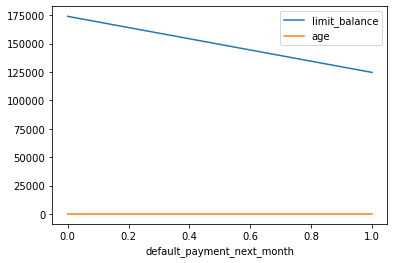

In [170]:
source_price = data.groupby('default_payment_next_month').mean()[['limit_balance','age']]
source_price.plot.line()

Sekilas bisa dilihat bahwa Age tidak bisa menentukan capital gain seseorang, karena banyak faktor lain yang mempengaruhi

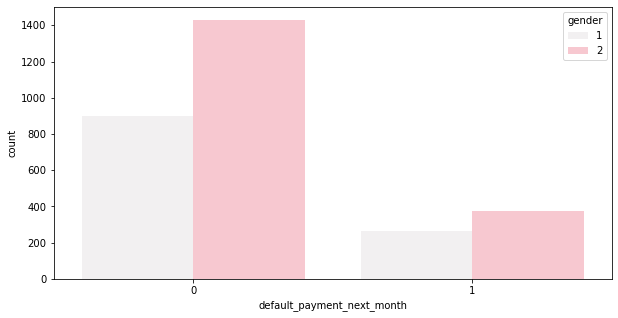

In [171]:
# Create Histogram and Scatter Plot

plt.figure(figsize=(10,5))
sns.countplot(x='default_payment_next_month', hue='gender', data=data, color='pink')
plt.show()

Gender terbagi Male dan Female, default payment next month didominasi oleh gender female.

# 5 - Data Preprocessing

**Data Splitting**

Pada data splitting akan dibagi menjadi 3
1. Inference Set : 
2. Train Set : digunakan untuk melatih algoritma dalam mencari model yang sesuai,
3. Test Set : dipakai untuk menguji dan mengetahui performa model yang didapatkan pada tahapan testing

Proporsi split data 80% untuk train-set dan 20% untuk test-set

In [172]:
# Set Random State

random_state = 15

#### Inference Set Preparation

In [173]:
# Inference Set Preparation
# Digunakan untuk mencoba masukkan data baru

inf_set = data.sample(15, random_state=random_state)
inf_set.shape

(15, 24)

In [174]:
# Exclude Inference-Set
# Data akan digunakan testing pada saat model sudah fix

train_test_set = data.drop(inf_set.index)
train_test_set.reset_index(drop=True, inplace=True)

print('Dataset before exclude Inference-set :', data.shape)
print('Dataset after exclude Inference-set :', train_test_set.shape)

Dataset before exclude Inference-set : (2965, 24)
Dataset after exclude Inference-set : (2950, 24)


#### Splitting Data

In [175]:
# Splitting Dataset

# Data yang akan digunakan diluar data target
X = train_test_set.drop(['default_payment_next_month'], axis=1)

# Data yang memiliki target
y = train_test_set['default_payment_next_month']

In [176]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

print('Train Size : ', X_train.shape)
print('Test Size : ', X_test.shape)

Train Size :  (2360, 23)
Test Size :  (590, 23)


#### Detect Outlier

*Mendefinisikan Normal Distirbusi*

In [177]:
# Normal Distribution

def out_std(data, column):
    global lower, upper
    # Calculate the mean and std of the data frame
    data_mean, data_std = data[column].mean(), data[column].std()

    # Calculate the cutoff value
    cut_off = data_std * 3

    # calculate the lower and upper bound value
    lower, upper = data_mean - cut_off, data_mean + cut_off

    print('The lower bound value is', lower)
    print('The upper bound value is', upper)

    # Procentage the outlier
    total_count = lower + upper
    percentage = format(len(data[data[column] > upper])/len(data)*100)
        
    # Calculate the number of records below and above lower and above bound value respectively
        
    df1 = data[data[column] > upper] 
    df2 = data[data[column] < lower]
    i = ('Total number of outlier are', df1.shape[0] + df2.shape[0], 'Percentage', percentage)


In [178]:
print(" -------------Detection age Outlier--------------")
out_std(data, 'education_level')
print(" -------------Detection capital_gain Outlier--------------")
out_std(data, 'pay_1')
print(" -------------Detection capital_loss Outlier--------------")
out_std(data, 'pay_2')
print(" -------------Detection hours_per_week Outlier--------------")
out_std(data, 'pay_3')
print(" -------------Detection hours_per_week Outlier--------------")
out_std(data, 'pay_4')
print(" -------------Detection hours_per_week Outlier--------------")
out_std(data, 'pay_5')
print(" -------------Detection hours_per_week Outlier--------------")
out_std(data, 'pay_6')


 -------------Detection age Outlier--------------
The lower bound value is -0.4849745551941076
The upper bound value is 4.1841313848737025
 -------------Detection capital_gain Outlier--------------
The lower bound value is -3.338127345158191
The upper bound value is 3.348245389003048
 -------------Detection capital_loss Outlier--------------
The lower bound value is -3.664779894568909
The upper bound value is 3.4199232335233773
 -------------Detection hours_per_week Outlier--------------
The lower bound value is -3.692543148560469
The upper bound value is 3.409237920904482
 -------------Detection hours_per_week Outlier--------------
The lower bound value is -3.7201273964764776
The upper bound value is 3.349806991754724
 -------------Detection hours_per_week Outlier--------------
The lower bound value is -3.7023029617143592
The upper bound value is 3.251712742490076
 -------------Detection hours_per_week Outlier--------------
The lower bound value is -3.75655221168516
The upper bound va

*Mendefiniskan IQR, lower dan upper*

In [179]:
# Skewed Distribution

def out_iqr(data, column):
    global lower, upper
    q25, q75 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)

    # calculate the IQR
    iqr = q75 - q25

    #calculate the outlier cutoff
    cut_off = iqr * 1.5


    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off

    # Procentage the outlier
    total_count = lower + upper
    percentage = format(len(data[data[column] > upper])/len(data)*100)

    print('The IQR is', iqr, 'The lower bound is', lower, 'The upper bound value is', upper, 'Percentage', percentage)

    # calculate the number of records below and above lower and above bound value respectively
    df1 = data[data[column] > upper]
    df2 = data[data[column] < lower]
    
    return print('Total number of outliers are', df1.shape[0] + df2.shape[0])

In [260]:
# Print distribution
# Sample

print(" -------------Detection education level Outlier--------------")
out_iqr(data, 'education_level')
print(" -------------Detection pay 1 Outlier--------------")
out_iqr(data, 'pay_1')
print(" -------------Detection pay 2 Outlier--------------")
out_iqr(data, 'pay_2')
print(" -------------Detection pay 3 Outlier--------------")
out_iqr(data, 'pay_3')
print(" -------------Detection pay 4 Outlier--------------")
out_iqr(data, 'pay_4')
print(" -------------Detection pay 5 Outlier--------------")
out_iqr(data, 'pay_5')
print(" -------------Detection pay 6 Outlier--------------")
out_iqr(data, 'pay_6')


 -------------Detection education level Outlier--------------
The IQR is 1.0 The lower bound is -0.5 The upper bound value is 3.5 Percentage 1.3827993254637436
Total number of outliers are 41
 -------------Detection pay 1 Outlier--------------
The IQR is 1.0 The lower bound is -2.5 The upper bound value is 1.5 Percentage 10.320404721753794
Total number of outliers are 306
 -------------Detection pay 2 Outlier--------------
The IQR is 1.0 The lower bound is -2.5 The upper bound value is 1.5 Percentage 14.198988195615513
Total number of outliers are 421
 -------------Detection pay 3 Outlier--------------
The IQR is 1.0 The lower bound is -2.5 The upper bound value is 1.5 Percentage 13.76053962900506
Total number of outliers are 408
 -------------Detection pay 4 Outlier--------------
The IQR is 1.0 The lower bound is -2.5 The upper bound value is 1.5 Percentage 12.074198988195615
Total number of outliers are 358
 -------------Detection pay 5 Outlier--------------
The IQR is 1.0 The lower 

Dataset memiliki beberapa outliers, untuk outiliers ini kita abaikan, karena dianggap sesuai dengan kondisi credit card nasabah

#### Detect Missing Value

*Kali ini kita akan mendeteksi adanya oulier pada dataset*

In [183]:
# Detect Missing Values

def missing_values_table_(data) :

    # Total missing values
    mis_val = data.isnull().sum()

    # Precentage of missing values
    mis_val_percent = 100 * data.isnull().sum() / len(data)

    # Make a table with the result
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis = 1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] !=0].sort_values('% of Total Values', ascending=False).round(1)

    # Print some summary information
    print ("Your selected dataframe has " + str(data.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [184]:
# Missing Values X_train

train_missing = missing_values_table_(X_train)
train_missing

Your selected dataframe has 23 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


> Tidak terdapat missing values di kolom X_train

In [185]:
# Missing Values X_test

train_missing = missing_values_table_(X_test)
train_missing

Your selected dataframe has 23 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


> Tidak terdapat missing values di kolom X_test

**Missing Value di kolom target**

In [186]:
# Cek missing value di y_train
print('missing values di y_train :', y_train.isna().any())

# Cek missing value di X
print('missing values di y_test :', y_test.isna().any())

missing values di y_train : False
missing values di y_test : False


> Tidak terdapat missing values di kolom target

#### Feature Selection

Feature selection memilih feature yang berpengaruh dan mengesampingkan feature yang tidak berpengaruh dalam suatu kegiatan pemodelan atau penganalisaan data

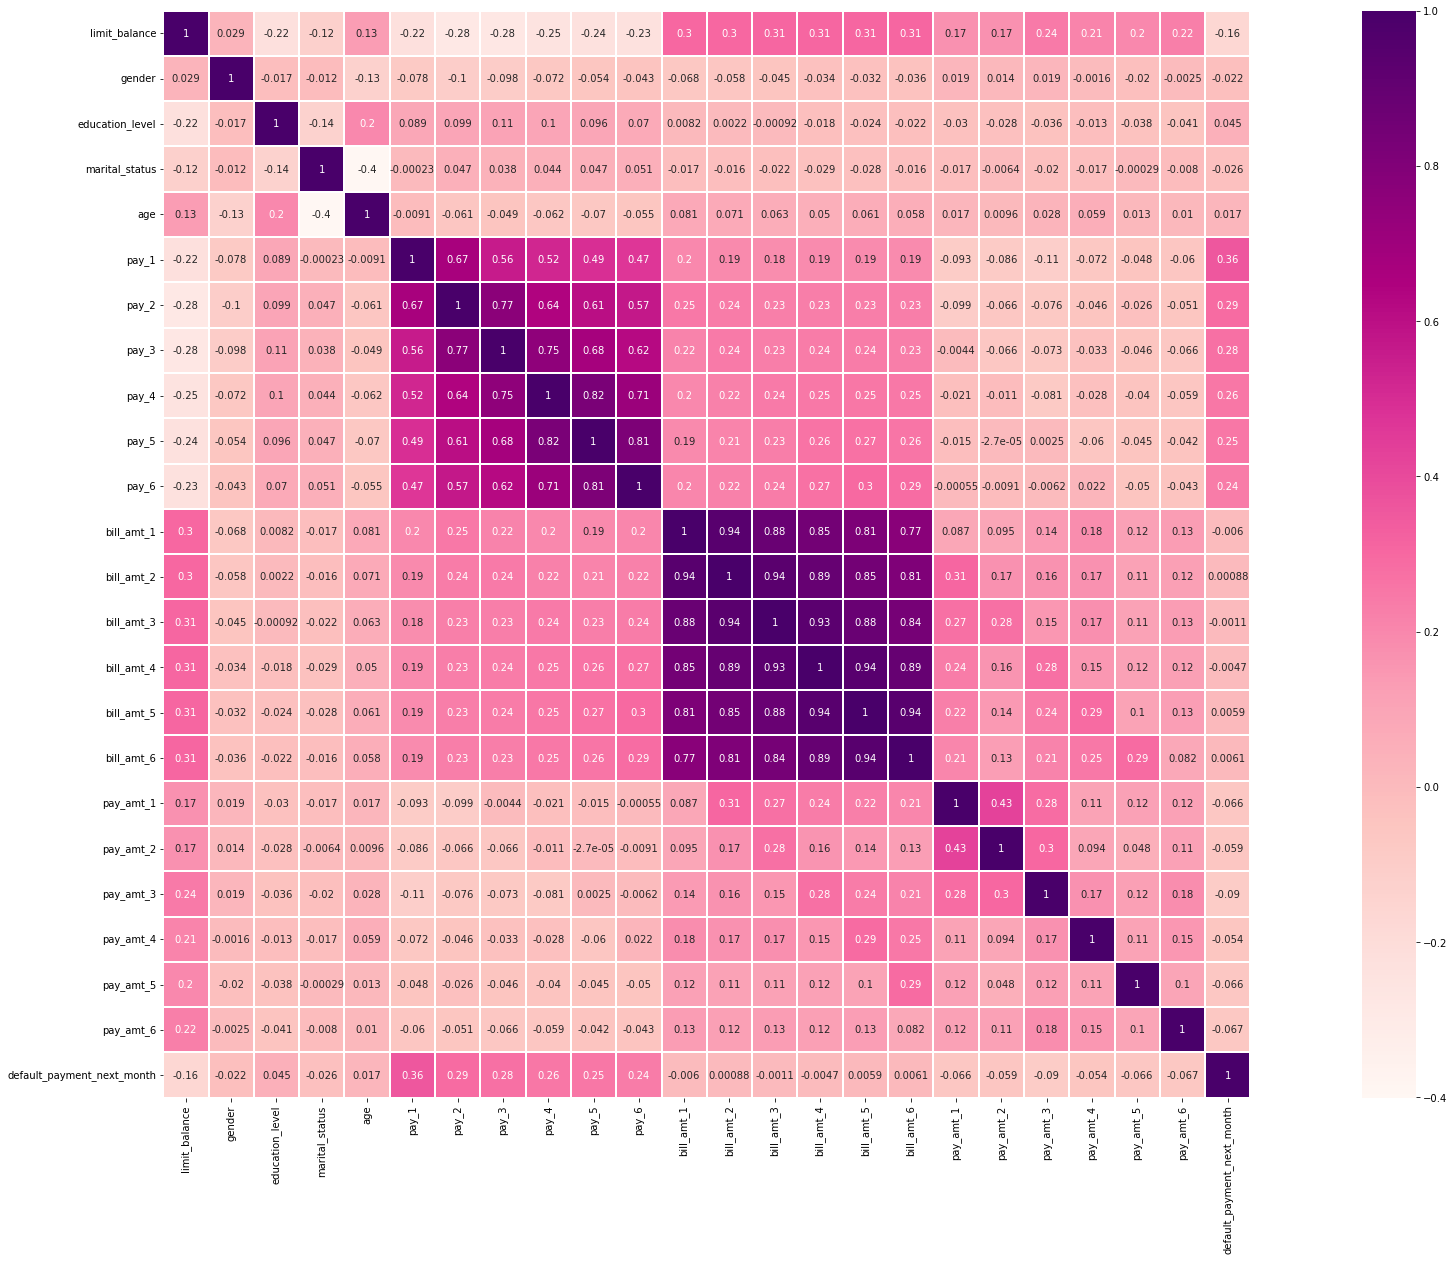

In [187]:
# Check korelasi antara kolom

# Heatmap
corrmat = data.corr()
top_corr_feature = corrmat.index

plt.figure(figsize=(40,20))
g = sns.heatmap(data[top_corr_feature].corr(), annot=True, cmap='RdPu', square=10, linewidths=0.2)

> Seperti yang sudah dijelaskan di EDA bahwa ada beberapa kolom yang saling berhubungan dengan kolom target `(default_payment_next_month)`.

**Column Categorization**

In [188]:
# Get Numerical Columns and Categorical Columns
num_column = ['limit_balance', 'gender', 'education_level', 'marital_status', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6']
cat_column = ['age', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6', ]

print('numerical columns :', num_column)
print('-------------------------------------------------------------------------------' )
print('categorical columns :', cat_column)
print('-------------------------------------------------------------------------------' )

# Combine two category
final_feature = num_column + cat_column

numerical columns : ['limit_balance', 'gender', 'education_level', 'marital_status', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6']
-------------------------------------------------------------------------------
categorical columns : ['age', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
-------------------------------------------------------------------------------


In [189]:
# Use selected variables
X_train = X_train[final_feature]
X_test = X_test[final_feature]

In [190]:
# Split Train-Set and Test-Set based on Column Type

X_train_num = X_train[num_column]
X_train_cat = X_train[cat_column]

X_test_num = X_test[num_column]
X_test_cat = X_test[cat_column]

In [191]:
# Feature Scaling using MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_final = scaler.transform(X_train_num)
X_test_final = scaler.transform(X_test_num)

In [192]:
# Pipeline untuk Feature Engineering

pipe_FE = ColumnTransformer([('OH', OneHotEncoder(), cat_column), ('Scaler', MinMaxScaler(), num_column)])

# 6 - Model Definition

**Model**

1. Algoritma yang dipakai adalah 
    - Logistic Regression
    - SVM
    - Decision Tree
    - Random Forest Classifier
    - KNN
    - Naive Bayes
    - Adaboost
2. Metrics yang dipakai untuk mengevaluasi `Mean Absolute Error (MAE)`

**Logistic Regression**

In [193]:
# Model
log_reg = LogisticRegression(max_iter=100)

# Model Pipeline
pipe_log_reg = Pipeline([('preprocessing', pipe_FE),
                ('log_reg', log_reg)])

# Hyperparameter
param_log_reg = [    
                {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
                'C' : np.logspace(-4, 4, 20),
                'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
                'max_iter' : [10, 100]}
                ]

**SVM**

In [194]:
# Model
svm = SVC()

# Model Pipeline
pipe_svm = Pipeline([('preprocessing', pipe_FE),
            ('svm', svm)])

# Hyperparameter
param_svm = {'C':[0.1,1,10],
             'kernel':['rbf','poly','linear'],
             'degree':[1,3,6]}

**Decision Tree**

In [195]:
# Model
DT = DecisionTreeClassifier()

# Model Pipeline
pipe_DT = Pipeline([('preprocessing', pipe_FE),
            ('DT', DT)])

# Hyperparameter
param_DT = {'max_depth': [2, 3, 5, 10, 20],
            'min_samples_leaf': [5, 10, 20, 50, 100],
            'criterion': ["gini", "entropy"]}

**Random Forest Classifier**

In [196]:
# Model
RF = RandomForestClassifier()

# Model Pipeline
pipe_RF = Pipeline([('preprocessing', pipe_FE),
            ('RF', RF)])

# Hyperparameter
param_RF = {'n_estimators' : [5, 20, 50],
            'max_depth' : [1, 2, 3],
            'max_features' : ["sqrt", "auto"],
            'criterion': ['gini','entropy']}


**KNN**

In [197]:
# Model
KNN = KNeighborsClassifier()

# Model Pipeline
pipe_KNN = Pipeline([('preprocessing', pipe_FE),
            ('KNN', KNN)])

# Hyperparameter
param_KNN = {'n_neighbors': [1, 5, 7, 9, 11, 13, 15]}

**Naive Bayes**

In [198]:
# Model
g_NB = GaussianNB()

# Model Pipeline
pipe_g_NB = Pipeline([('preprocessing', pipe_FE),
            ('g_NB', g_NB)])

# Hyperparameter
param_g_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

**Adaboost**

In [199]:
# Model
Ada = AdaBoostClassifier(random_state=random_state)

# Model Pipeline
pipe_Ada = Pipeline([('preprocessing', pipe_FE),
            ('Ada', Ada)])

# Hyperparameter
param_Ada = {'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20, 30],
                'learning_rate': [0.1, 0.5, 1, 10, 50],
                'algorithm': ['SAMME', 'SAMME.R']}

# 7 - Model Training

Pada sub bab ini berisikan Model Training menggunakan Cross Validation dan Hyperparameter Tuning

In [262]:
data.shape

(2965, 24)

In [266]:
# Cross Validation

num_folds = 10
seed = 7
scoring = 'f1_macro'
ensemble = []
ensemble.append(('log_reg', LogisticRegression()))
ensemble.append(('svm', SVC()))
ensemble.append(('DT', DecisionTreeClassifier()))
ensemble.append(('RF', RandomForestClassifier()))
ensemble.append(('KNN', KNeighborsClassifier()))
ensemble.append(('g_NB', GaussianNB()))
ensemble.append(('Ada', AdaBoostClassifier()))

results = []
names = []
for name, model in ensemble:
    model.fit(X_train, y_train)
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s %f %f "%(name, cv_results.mean(), cv_results.std())
    print(msg)

log_reg 0.451997 0.016856 
svm 0.439450 0.007962 
DT 0.542929 0.038656 
RF 0.546122 0.047622 
KNN 0.560788 0.026291 
g_NB 0.351148 0.029777 
Ada 0.544923 0.051557 


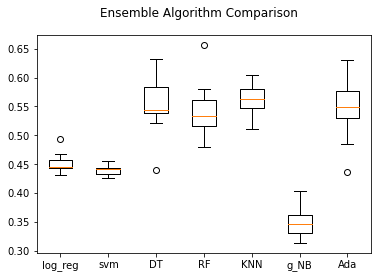

In [201]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Boxplot ini merupakan visualisasi dari hasil cross validation dari beberapa model. Dapat dilihat bahwa pada model logreg, Dicision Tree, Random Forest, dan Adaboost terdapat data outliers.

Sesuai dengan model, cross validation dengan K-fold 10 dengan hasil paling bagus ada di model `KNN 0.560788 0.026291 `

# 8 - Model Evaluation

**Logistic Regression**

In [202]:
# Hyperparameter Log_reg

grid_LR = GridSearchCV(estimator=log_reg, 
                        param_grid=param_log_reg, 
                        cv=4, n_jobs=-1, verbose=1, scoring = "f1_macro")
grid_LR.fit(X_train_final, y_train)

best_estimator_LR = grid_LR.best_estimator_
best_param_LR = grid_LR.best_params_
print(best_param_LR)

Fitting 4 folds for each of 800 candidates, totalling 3200 fits


/Users/macpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/macpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/macpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/macpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/macpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/macpro/opt/anaconda3/lib/python3.9/sit

{'C': 0.0001, 'max_iter': 10, 'penalty': 'l1', 'solver': 'liblinear'}


/Users/macpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/macpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/macpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Model Logistic Regression mendapatkan nilai C = 0.0001, Max_iter : 10, penalty = l1, dan solver : liblinear

**SVM**

In [203]:
# Hyperparameter SVM

grid_SVM = GridSearchCV(SVC(), param_svm)
grid_SVM.fit(X_train_final, y_train)

best_estimator_SVM = grid_SVM.best_estimator_
best_param_SVM = grid_SVM.best_params_
print(best_param_SVM)

{'C': 10, 'degree': 3, 'kernel': 'poly'}


**Decision Tree**

In [204]:
# Hyperparameter Decision Tree

grid_DT = GridSearchCV(estimator=DT, 
                        param_grid=param_DT, 
                        cv=4, n_jobs=-1, verbose=1, scoring = "f1_macro")
grid_DT.fit(X_train_final, y_train)

best_estimator_DT = grid_DT.best_estimator_
best_param_DT = grid_DT.best_params_
print(best_param_DT)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 20}


**Random Forest Classifier**

In [267]:
# Hyperparameter Random Forest Classifier

grid_RF = GridSearchCV(estimator=RF, 
                        param_grid=param_RF, 
                        cv=4, n_jobs=-1, verbose=1, scoring = "f1_macro")
grid_RF.fit(X_train_final, y_train)

best_estimator_RF = grid_RF.best_estimator_
best_param_RF = grid_RF.best_params_
print(best_param_RF)

Fitting 4 folds for each of 36 candidates, totalling 144 fits
{'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'n_estimators': 5}


**KNN**

In [268]:
# Hyperparameter KNN

grid_KNN = GridSearchCV(estimator=KNN, 
                        param_grid=param_KNN, 
                        cv=3, n_jobs=-1, verbose=1, scoring = "f1_macro")
grid_KNN.fit(X_train_final, y_train)

best_estimator_KNN = grid_KNN.best_estimator_
best_param_KNN = grid_KNN.best_params_
print(best_param_KNN)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
{'n_neighbors': 1}


**Naive Bayes**

In [207]:
# Hyperparameter Gaussian Naive Bayes

grid_g_NB = GridSearchCV(estimator=g_NB, 
                        param_grid=param_g_NB, 
                        cv=3, n_jobs=-1, verbose=1, scoring = "f1_macro")
grid_g_NB.fit(X_train_final, y_train)

best_estimator_g_NB = grid_g_NB.best_estimator_
best_param_g_NB = grid_g_NB.best_params_
print(best_param_g_NB)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'var_smoothing': 0.001}


**Adaboost**

In [208]:
# Hyperparameter Adaboost

grid_Ada = GridSearchCV(estimator=Ada, 
                        param_grid=param_Ada, 
                        cv=3, n_jobs=-1, verbose=1, scoring = "f1_macro")
grid_Ada.fit(X_train_final, y_train)

best_estimator_Ada = grid_Ada.best_estimator_
best_param_Ada = grid_Ada.best_params_
print(best_param_Ada)


Fitting 3 folds for each of 140 candidates, totalling 420 fits


/Users/macpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/macpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 2, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/Users/macpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:655: RuntimeWarning: overflow encountered in exp
  sample_weight = np.exp(
/Users/macpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:486: UserWarning: Sample weights have reached infinite values, at iteration 2, causing overflow. Iterations stopped. Try lowering the learning rate.
  return super().fit(X, y, sample_weight)
/Users/macpro/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:655

{'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 30}


**Model Evaluasi**

Pada model evaluasi kita sangat mengingkan default_payment_next_month yang mana tidak terjadinya gagal bayar, dalam prediksi masuk ke kategori True Positif dan berfokus pada precission.

***Model Evaluation - Logistic Regression***

In [209]:
# Classification Report
print('---------- Train-set Logistic Regression Classification Report ---------')
print(classification_report(y_train, best_estimator_LR.predict(X_train_final), target_names=['Not Default Payment', 'Default Payment']))
print('---------- Test-set Logistic Regression Classification Report ---------')
print(classification_report(y_test, best_estimator_LR.predict(X_test_final), target_names=['Not Default Payment', 'Default Payment']))

# Performance Metrics
print('---------- Train-set Logistic Regression Performance ---------')
print(roc_auc_score(y_train, best_estimator_LR.predict(X_train_final)))
print('---------- Test-set Logistic Regression Performance ---------')
print(roc_auc_score(y_test, best_estimator_LR.predict(X_test_final)))

---------- Train-set Logistic Regression Classification Report ---------
                     precision    recall  f1-score   support

Not Default Payment       0.78      1.00      0.88      1851
    Default Payment       0.00      0.00      0.00       509

           accuracy                           0.78      2360
          macro avg       0.39      0.50      0.44      2360
       weighted avg       0.62      0.78      0.69      2360

---------- Test-set Logistic Regression Classification Report ---------
                     precision    recall  f1-score   support

Not Default Payment       0.79      1.00      0.88       467
    Default Payment       0.00      0.00      0.00       123

           accuracy                           0.79       590
          macro avg       0.40      0.50      0.44       590
       weighted avg       0.63      0.79      0.70       590

---------- Train-set Logistic Regression Performance ---------
0.5
---------- Test-set Logistic Regression Performanc

***Model Evaluation - SVM***

In [210]:
# Classification Report
print('---------- Train-set SVM Classification Report ---------')
print(classification_report(y_train, best_estimator_SVM.predict(X_train_final), target_names=['Not Default Payment', 'Default Payment']))
print('---------- Test-set SVM Classification Report ---------')
print(classification_report(y_test, best_estimator_SVM.predict(X_test_final), target_names=['Not Default Payment', 'Default Payment']))

# Performance Metrics
print('---------- Train-set SVM Performance ---------')
print(roc_auc_score(y_train, best_estimator_SVM.predict(X_train_final)))
print('---------- Test-set SVM Performance ---------')
print(roc_auc_score(y_test, best_estimator_SVM.predict(X_test_final)))

---------- Train-set SVM Classification Report ---------
                     precision    recall  f1-score   support

Not Default Payment       0.79      1.00      0.88      1851
    Default Payment       1.00      0.01      0.01       509

           accuracy                           0.79      2360
          macro avg       0.89      0.50      0.45      2360
       weighted avg       0.83      0.79      0.69      2360

---------- Test-set SVM Classification Report ---------
                     precision    recall  f1-score   support

Not Default Payment       0.79      1.00      0.88       467
    Default Payment       0.00      0.00      0.00       123

           accuracy                           0.79       590
          macro avg       0.40      0.50      0.44       590
       weighted avg       0.63      0.79      0.70       590

---------- Train-set SVM Performance ---------
0.5029469548133595
---------- Test-set SVM Performance ---------
0.5


**Model Evaluation - Decision Tree**

In [211]:
# Classification Report
print('---------- Train-set Decision Tree Classification Report ---------')
print(classification_report(y_train, best_estimator_DT.predict(X_train_final), target_names=['Not Default Payment', 'Default Payment']))
print('---------- Test-set Decision Tree Classification Report ---------')
print(classification_report(y_test, best_estimator_DT.predict(X_test_final), target_names=['Not Default Payment', 'Default Payment']))

# Performance Metrics
print('---------- Train-set DT Performance ---------')
print(roc_auc_score(y_train, best_estimator_DT.predict(X_train_final)))
print('---------- Test-set DT Performance ---------')
print(roc_auc_score(y_test, best_estimator_DT.predict(X_test_final)))

---------- Train-set Decision Tree Classification Report ---------
                     precision    recall  f1-score   support

Not Default Payment       0.82      0.97      0.89      1851
    Default Payment       0.65      0.23      0.34       509

           accuracy                           0.81      2360
          macro avg       0.73      0.60      0.61      2360
       weighted avg       0.78      0.81      0.77      2360

---------- Test-set Decision Tree Classification Report ---------
                     precision    recall  f1-score   support

Not Default Payment       0.81      0.94      0.87       467
    Default Payment       0.41      0.15      0.22       123

           accuracy                           0.78       590
          macro avg       0.61      0.55      0.55       590
       weighted avg       0.73      0.78      0.74       590

---------- Train-set DT Performance ---------
0.5976432852628909
---------- Test-set DT Performance ---------
0.548327849445518


***Model Evaluation - Random Forest Classifier***

In [212]:
# Classification Report
print('---------- Train-set Random Forest Classifier Classification Report ---------')
print(classification_report(y_train, best_estimator_RF.predict(X_train_final), target_names=['Not Default Payment', 'Default Payment']))
print('---------- Test-set Random Forest Classifier Classification Report ---------')
print(classification_report(y_test, best_estimator_RF.predict(X_test_final), target_names=['Not Default Payment', 'Default Payment']))

# Performance Metrics
print('---------- Train-set RF Performance ---------')
print(roc_auc_score(y_train, best_estimator_RF.predict(X_train_final)))
print('---------- Test-set RF Performance ---------')
print(roc_auc_score(y_test, best_estimator_RF.predict(X_test_final)))

---------- Train-set Random Forest Classifier Classification Report ---------
                     precision    recall  f1-score   support

Not Default Payment       0.78      1.00      0.88      1851
    Default Payment       0.00      0.00      0.00       509

           accuracy                           0.78      2360
          macro avg       0.39      0.50      0.44      2360
       weighted avg       0.62      0.78      0.69      2360

---------- Test-set Random Forest Classifier Classification Report ---------
                     precision    recall  f1-score   support

Not Default Payment       0.79      1.00      0.88       467
    Default Payment       0.00      0.00      0.00       123

           accuracy                           0.79       590
          macro avg       0.40      0.50      0.44       590
       weighted avg       0.63      0.79      0.70       590

---------- Train-set RF Performance ---------
0.5
---------- Test-set RF Performance ---------
0.5


***Model Evaluation - KNN***

In [213]:
# Classification Report
print('---------- Train-set KNN Classification Report ---------')
print(classification_report(y_train, best_estimator_KNN.predict(X_train_final), target_names=['Not Default Payment', 'Default Payment']))
print('---------- Test-set KNN Classification Report ---------')
print(classification_report(y_test, best_estimator_KNN.predict(X_test_final), target_names=['Not Default Payment', 'Default Payment']))

# Performance Metrics
print('---------- Train-set KNN Performance ---------')
print(roc_auc_score(y_train, best_estimator_KNN.predict(X_train_final)))
print('---------- Test-set KNN Performance ---------')
print(roc_auc_score(y_test, best_estimator_KNN.predict(X_test_final)))

---------- Train-set KNN Classification Report ---------
                     precision    recall  f1-score   support

Not Default Payment       1.00      1.00      1.00      1851
    Default Payment       0.99      0.99      0.99       509

           accuracy                           1.00      2360
          macro avg       1.00      1.00      1.00      2360
       weighted avg       1.00      1.00      1.00      2360

---------- Test-set KNN Classification Report ---------
                     precision    recall  f1-score   support

Not Default Payment       0.81      0.81      0.81       467
    Default Payment       0.29      0.30      0.29       123

           accuracy                           0.70       590
          macro avg       0.55      0.55      0.55       590
       weighted avg       0.70      0.70      0.70       590

---------- Train-set KNN Performance ---------
0.9952603541440457
---------- Test-set KNN Performance ---------
0.5529760972127923


***Model Evaluation - Naive Bayes***

In [214]:
# Classification Report
print('---------- Train-set Naive Bayes Classification Report ---------')
print(classification_report(y_train, best_estimator_g_NB.predict(X_train_final), target_names=['Not Default Payment', 'Default Payment']))
print('---------- Test-set Naive Bayes Classification Report ---------')
print(classification_report(y_test, best_estimator_g_NB.predict(X_test_final), target_names=['Not Default Payment', 'Default Payment']))

# Performance Metrics
print('---------- Train-set Naive Bayes Performance ---------')
print(roc_auc_score(y_train, best_estimator_g_NB.predict(X_train_final)))
print('---------- Test-set Naive Bayes Performance ---------')
print(roc_auc_score(y_test, best_estimator_g_NB.predict(X_test_final)))

---------- Train-set Naive Bayes Classification Report ---------
                     precision    recall  f1-score   support

Not Default Payment       0.79      1.00      0.88      1851
    Default Payment       0.55      0.01      0.02       509

           accuracy                           0.78      2360
          macro avg       0.67      0.50      0.45      2360
       weighted avg       0.73      0.78      0.69      2360

---------- Test-set Naive Bayes Classification Report ---------
                     precision    recall  f1-score   support

Not Default Payment       0.79      0.99      0.88       467
    Default Payment       0.33      0.02      0.03       123

           accuracy                           0.79       590
          macro avg       0.56      0.50      0.46       590
       weighted avg       0.70      0.79      0.70       590

---------- Train-set Naive Bayes Performance ---------
0.5045432883409277
---------- Test-set Naive Bayes Performance ---------
0.503

***Model Evaluation - Adaboost***

In [215]:
# Classification Report
print('---------- Train-set Naive Bayes Classification Report ---------')
print(classification_report(y_train, best_estimator_Ada.predict(X_train_final), target_names=['Not Default Payment', 'Default Payment']))
print('---------- Test-set Naive Bayes Classification Report ---------')
print(classification_report(y_test, best_estimator_Ada.predict(X_test_final), target_names=['Not Default Payment', 'Default Payment']))

# Performance Metrics
print('---------- Train-set Adaboost Performance ---------')
print(roc_auc_score(y_train, best_estimator_Ada.predict(X_train_final)))
print('---------- Test-set Adaboost Performance ---------')
print(roc_auc_score(y_test, best_estimator_Ada.predict(X_test_final)))

---------- Train-set Naive Bayes Classification Report ---------
                     precision    recall  f1-score   support

Not Default Payment       0.79      0.99      0.88      1851
    Default Payment       0.56      0.04      0.07       509

           accuracy                           0.79      2360
          macro avg       0.67      0.51      0.47      2360
       weighted avg       0.74      0.79      0.70      2360

---------- Test-set Naive Bayes Classification Report ---------
                     precision    recall  f1-score   support

Not Default Payment       0.80      1.00      0.88       467
    Default Payment       0.67      0.03      0.06       123

           accuracy                           0.79       590
          macro avg       0.73      0.51      0.47       590
       weighted avg       0.77      0.79      0.71       590

---------- Train-set Adaboost Performance ---------
0.5146121832939027
---------- Test-set Adaboost Performance ---------
0.514118834

Model yang paling bagus dari reoprt classification diatas adalah KNN 
- Cross Validation : 0.560788 0.026291 
- Hyperparameter : 'n_neighbors': 1
- f1 Score : 1, 0.99

# 9 - Model Inference


> Dataset yang sudah diproses, mari kita coba dengan data yang baru

**Load Model**

In [217]:
inf_set

,limit_balance,gender,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2406,90000.0,2,2,1,25.0,-1.0,-1.0,0.0,0.0,0,...,43380.0,46632.0,14177.0,93788.0,10000.0,33000.0,5300.0,5000.0,2913.0,0
455,110000.0,1,2,2,29.0,0.0,0.0,0.0,0.0,0,...,111771.0,111703.0,111864.0,4000.0,4300.0,4164.0,4500.0,4200.0,5000.0,0
869,50000.0,1,2,2,38.0,0.0,0.0,0.0,0.0,0,...,17833.0,18246.0,18642.0,1300.0,1600.0,650.0,700.0,700.0,700.0,0
361,20000.0,2,2,1,21.0,0.0,0.0,0.0,2.0,0,...,17482.0,34862.0,14860.0,1252.0,3124.0,0.0,349.0,297.0,0.0,0
1893,250000.0,1,1,2,35.0,2.0,2.0,2.0,2.0,2,...,180382.0,182914.0,186838.0,15000.0,0.0,24000.0,7000.0,7000.0,6700.0,1
1812,200000.0,1,2,1,32.0,2.0,2.0,2.0,2.0,2,...,115896.0,112545.0,115565.0,5400.0,5000.0,5000.0,0.0,5000.0,4235.0,1
1101,230000.0,2,1,2,27.0,0.0,0.0,0.0,0.0,0,...,42944.0,40391.0,35820.0,2963.0,1941.0,1534.0,1532.0,1565.0,1330.0,0
2355,50000.0,2,2,2,30.0,1.0,3.0,2.0,2.0,2,...,48439.0,49418.0,50326.0,0.0,2000.0,2000.0,1900.0,1900.0,1900.0,1
274,50000.0,1,2,2,56.0,0.0,0.0,0.0,0.0,0,...,44932.0,19559.0,18859.0,1884.0,1997.0,1943.0,693.0,683.0,680.0,0
923,20000.0,2,3,1,42.0,0.0,0.0,0.0,0.0,0,...,17496.0,18219.0,18783.0,1300.0,1300.0,1280.0,1000.0,1000.0,1107.0,0


In [269]:
# Split dataset X (train) dan y (target)

# X_inf
X_inf = inf_set.drop(['default_payment_next_month'], axis=1)

# use same variables in final features
X_inf = X_inf[num_column]

# y will be consist of target parameter only
y_inf = inf_set['default_payment_next_month']

In [223]:
# Feature Scaling
scaler.fit(X_inf)
data_inf_final = scaler.transform(X_inf)
data_inf_final


array([[0.30434783, 1.        , 0.5       , 0.        , 0.05166636,
        0.13542872, 0.14843292, 0.2199352 , 0.23334571, 0.05221931],
       [0.39130435, 0.        , 0.5       , 1.        , 0.69752838,
        0.6837552 , 0.71435944, 0.60934128, 0.59940257, 0.58844841],
       [0.13043478, 0.        , 0.5       , 1.        , 0.27954126,
        0.22400339, 0.16201586, 0.07447517, 0.07366029, 0.07672884],
       [0.        , 1.        , 0.5       , 0.        , 0.09426709,
        0.14428619, 0.1645436 , 0.07247664, 0.16713358, 0.05596847],
       [1.        , 0.        , 0.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.7826087 , 0.        , 0.5       , 0.        , 0.71829623,
        0.70108054, 0.72780749, 0.63282829, 0.60413924, 0.60876415],
       [0.91304348, 1.        , 0.        , 1.        , 0.45793828,
        0.43634197, 0.37550144, 0.2174527 , 0.19823697, 0.17102331],
       [0.13043478, 1.        , 0.5      

In [232]:
# Model for Inference

KNN.fit(X_inf, y_inf)

KNeighborsClassifier()

In [233]:
y_pred_inf = KNN.predict(data_inf_final)
y_pred_inf

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [234]:
# Create Dataframe of default_payment_next_month prediction
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['default_payment_next_month - prediction'])
y_pred_inf_df

,default_payment_next_month - prediction
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


Dari hasil diatas menujukkan bahwa terdapat 1 nasabah yang kemungkinan gagal bayar

In [235]:
# Concate between Inference-Set and Rating's Prediction

inf_set.index = y_pred_inf_df.index
inf_final = pd.concat([inf_set, y_pred_inf_df], axis=1)
inf_final.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
limit_balance,90000.0,110000.0,50000.0,20000.0,250000.0,200000.0,230000.0,50000.0,50000.0,20000.0,120000.0,130000.0,90000.0,90000.0,200000.0
gender,2.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0
education_level,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,3.0,1.0,3.0,2.0,2.0,1.0
marital_status,1.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0
age,25.0,29.0,38.0,21.0,35.0,32.0,27.0,30.0,56.0,42.0,32.0,29.0,24.0,23.0,29.0
pay_1,-1.0,0.0,0.0,0.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0
pay_2,-1.0,0.0,0.0,0.0,2.0,2.0,0.0,3.0,0.0,0.0,0.0,-2.0,0.0,4.0,0.0
pay_3,0.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,-2.0,0.0,4.0,0.0
pay_4,0.0,0.0,0.0,2.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,-1.0,0.0,3.0,0.0
pay_5,0.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0,2.0,2.0,0.0,4.0,0.0


Pada `default_payment_next_month - prediction` sudah sesuai dengan data yang didapat, tidak akan terjadi gagal bayar untuk bulan depan.

In [272]:
# Classification Report
print('---------- Train-set Naive Bayes Classification Report ---------')
print(classification_report(y_inf, best_estimator_Ada.predict(X_inf), target_names=['Not Default Payment', 'Default Payment']))

---------- Train-set Naive Bayes Classification Report ---------
                     precision    recall  f1-score   support

Not Default Payment       1.00      0.08      0.15        12
    Default Payment       0.21      1.00      0.35         3

           accuracy                           0.27        15
          macro avg       0.61      0.54      0.25        15
       weighted avg       0.84      0.27      0.19        15



Data inference menunjukkan anatara not default payment dan default payment memiliki selisih yang besar (underfit)

# 10 - Pengambilan Kesimpulan

***====================================================================KESIMPULANNYA==========================================================================================***


***Problem :***
1. Apakah fungsi parameter criterion pada Decision Tree? Jelaskan salah satu criterion yang kalian pahami!
2. Apakah fungsi dari pruning pada Tree model?
3. Bagaimana cara memilih K yang optimal pada KNN?
4. Jelaskan apa yang kalian ketahui tentang Cross Validation!
5. Jelaskan apa yang kalian ketahui tentang Accuracy, Precision, Recall, F1 Score!

***Answer   :***
1. `Criterion` pada Decision Tree adalah parameter untuk memisahkan atribut. Untuk masing-masing kriteria yang dapat dipilih harus mengoptimalkan niail split dari decision tree. Salah satu criterianya adalah `Gini_index`, criteria ini mengukur ketidaksetaraan antara distribusi karakteristik label. Pemisahan pada atribut yang akan dipilih menghasilkan pengurangan indeks gini rata-rata himpunan bagian yang dhasilkan.
source :https://sis.binus.ac.id/2022/02/17/mengenal-algoritma-decision-tree/
2. `Pruning` pada Decision Tree berfungsi untuk mengurangi outlier maupun noise data pada tree awal sehingga dapat meningkatkan akurasi pada klasifikasi data.
source : Budi, Matin, IPB, 2010 : Perbandingan algoritme Pruning pada Decision Tree yang Dikembangjan dengan Algoritme CART.
3. Cara memilih K agar ooptimal dengan trial. Contoh untuk kelas berjumlah genap maka sebaiknya nilai K-nya ganjil, dan sebaliknya jika kelas berjumlah ganjil maka sebaiknya nilai K genap.
    source : https://ilmudatapy.com/algoritma-k-nearest-neighbor-knn-untuk-klasifikasi/
4. `Cross Validation` adalah suatu metode tambahan dari teknik data mining yang bertujuan untuk memperoleh hasil akurasi yang maksimal.
    source : https://www.pengalaman-edukasi.com/2020/04/apa-itu-k-fold-cross-validation.html
5.  - `Accuracy` : rasio prediksi True Positive (TP) dengan keseluruhan data
    - `Precision` : perbandingan True Positive (TP) dengan banyaknya data yang diprediksi
    - ` Recall` : perbandingan antara True Positive (TP) dengan banyaknya data yang sebenarnya positif.
    -`F1 Score` : harmonis mean dari precision dan recall F1 Score mengidentifikasi bahwa model klasifikasi mempunyai precision dan recall yang baik.
    source : https://stevkarta.medium.com/membicarakan-precision-recall-dan-f1-score-e96d81910354

***Model Analysis :***
1. Model yang digunakan dalam inference set adalah KNN, sebenarnya untuk hasil model terlihat iveerfit, tetapi untuk pembanding tidak ada, dikarenakan diluar model KNN terilhat underfit.
2. Hasil dari penggunaan model KNN, data inference untuk default payment next month terlihat bagus, tidak akan terjadi gagal bayar.



***Overall Analysis :***


1. Data diatas merupakan data nasabah-nasabah dari sebuah bank, yang mana tidak dihandle outlier, dikarenakan untuk tagihan (pay) terdapat angka minus karena pembayaran pada bulan sebelumnya tidak sesuai dengan tagihan.
2. Pada kolom default_payment ada beberapa nasabah yng diprediksi akan terjadinya gagal bayar, tetapi setelah dipresiksi kembali dengan menggunakan model KNN untuk nasabah yang diprediksi gagal bayar tidak ada.
3. Dari sample dapat dilihat bahwa kartu  kredit akan dibayarkan oleh nasabah sesuai dengan tagihan mereka